# Dataset Description

For this programming material, we are going to use 
[gene expression cancer RNA-Seq Data Set](https://archive.ics.uci.edu/dataset/401/gene+expression+cancer+rna+seq). Originally, this dataset is hosted at [synapse](https://www.synapse.org/) but for this programming material, we are going to extract dataset from [UCI](https://archive.ics.uci.edu/). The dataset contains gene expression of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and 
PRAD. 

**Source:** Samuele Fiorini, samuele.fiorini@dibris.unige.it, University of Genoa, redistributed under Creative Commons license (http://creativecommons.org/licenses/by/3.0/legalcode) from https://www.synapse.org/#!Synapse:syn4301332.

**Number of attributes:** 20531

**Number of instances:** 801

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("CANCER_RNA_SEQ/data.csv", index_col = 0)
labels = pd.read_csv("CANCER_RNA_SEQ/labels.csv", index_col = 0)

In [4]:
data.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.0,0.0,0.0,0.0,0.591871,5.619994,1.334282,0.000000,9.796088,0.0,0.000000,1.598651,7.215116,10.839070,6.620204,9.513538,0.0,4.063658,7.764805,4.747656,13.714396,10.034496,0.000000,0.0,9.833458,0.000000,...,9.370304,10.362393,5.589928,8.141964,0.000000,2.736583,7.037152,7.123480,10.967399,5.902800,3.719370,7.203554,6.042557,2.602077,7.425526,7.846957,2.824951,6.239396,0.000000,8.469593,0.0,6.535978,6.968701,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.0,0.0,0.0,0.0,0.000000,11.055208,3.562621,0.000000,10.070470,0.0,0.000000,0.000000,9.949812,8.522476,1.174790,4.926991,0.0,0.000000,5.819832,1.327170,13.286240,6.663316,0.587845,0.0,9.533302,0.811142,...,8.882967,9.898199,7.069401,7.186134,0.000000,3.134993,6.648930,6.715701,9.536238,1.004394,5.555482,8.029260,6.366219,0.811142,7.991732,7.161001,0.000000,4.708877,0.811142,8.451689,0.0,7.242336,8.046284,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.0,0.0,0.0,0.0,1.683023,8.210248,4.195285,3.660427,8.970920,0.0,0.000000,0.796598,6.096650,9.861616,7.680507,3.119439,0.0,0.452595,7.899526,0.000000,10.731098,6.967883,0.452595,0.0,9.646323,0.452595,...,10.355637,10.423274,5.170201,6.194260,0.000000,3.677147,6.271990,7.089816,9.675220,0.000000,4.224017,8.020402,6.967883,5.014445,8.400038,7.527555,0.000000,4.997902,0.796598,7.761132,0.0,6.820460,8.048983,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,0.434882,2.874246,0.000000,0.0,0.0,0.0,0.0,1.267356,8.306317,3.573556,0.000000,8.524616,0.0,0.000000,0.000000,3.913761,9.511573,6.469165,7.029895,0.0,1.267356,6.800641,7.742714,12.659474,8.299890,0.768587,0.0,9.670731,0.434882,...,10.074382,9.918261,7.117924,7.196145,0.434882,3.609755,8.896696,7.577096,10.731446,5.075383,2.175652,7.675435,6.840816,6.233192,8.899886,8.319085,1.791814,5.661134,1.464093,8.625727,0.0,7.420095,7.784746,7.613915,8.963286,7.744699,7.924997,8.981473,8.665592,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,1.275841,2.141204,0.000000,0.0,0.0,0.0,0.0,0.889707,10.149150,2.967630,0.000000,8.047238,0.0,1.435949,0.000000,1.942120,8.821535,5.861429,7.755709,0.0,0.649386,5.570241,2.612801,13.556734,8.004754,0.000000,0.0,9.587569,0.649386,...,10.129154,10.062303,6.911620,7.855149,0.360982,3.655810,7.255520,7.292607,10.779793,3.954001,6.991148,8.153248,7.508444,4.586531,9.152227,8.227717,0.360982,6.227104,0.649386,8.151879,0.0,6.558289,8.673708,6.505099,8.948989,7.010

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=500, random_state=989)
X_reduced = pca.fit_transform(X)

In [19]:
sum(pca.explained_variance_ratio_)

np.float64(0.9401873236427728)

# HyperParameters
## 1. Number of Cluster (K)
### Elbow Method

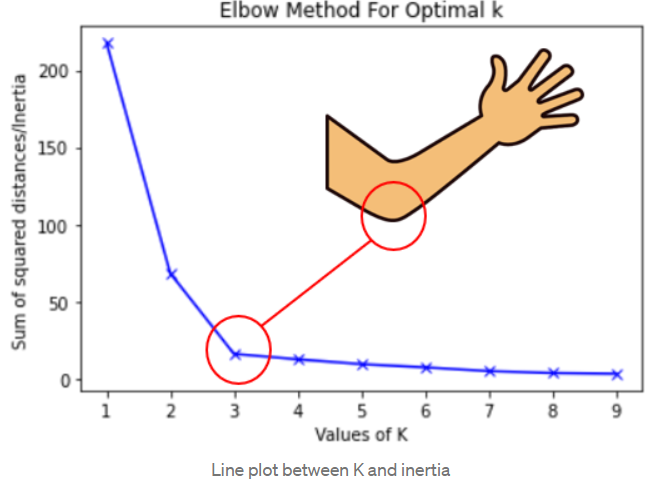

In [20]:
scores = []
for k in range(1,10):
    model = KMeans(n_clusters=k , random_state=99)
    model.fit(X_reduced)

    scores.append(model.inertia_)
    del model

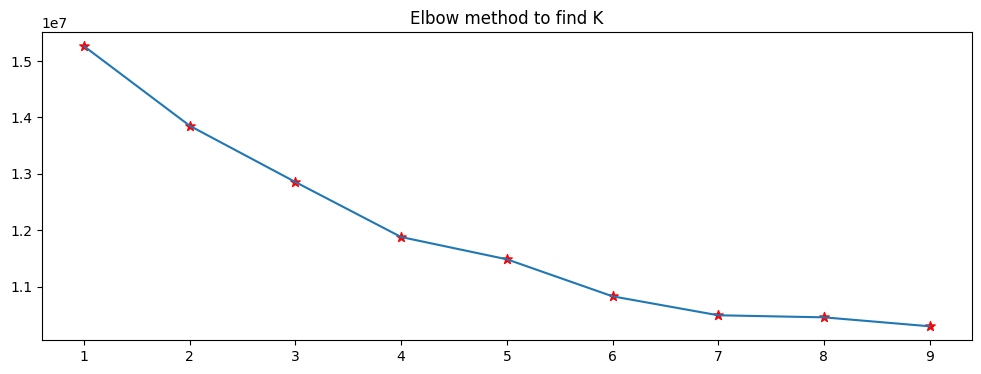

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(range(1,10), scores)
plt.scatter(range(1,10), scores, s = 50, marker = "*", c= "red")

plt.title("Elbow method to find K")
plt.show()

## 2. Centroid Initialization

### A . Random/ Frogy Initialization

Forgy initialization is the simplest method of cluster centroid initialization. In Forgy initialization, we pick the random _K_ points from the available data points and assign them as a cluster centroids.

### B. _K_-Means++

The _K_-Means++ is the popular centroid initialization method. This algorithm carefully selects the initial centroids for _K_-Means clustering. It follows a simple probability-based approach where the first centroid is selected at random and after that, the squared distance is calculated for all the data points with that centroid. For the next centroid, a data point that has the largest distance has the highest probability of being selected. This selection is decided based on a weighted probability score which we will also see in the code snippet below. The selection is continued until we have _K_ centroids, and then _K_-Means clustering is done using these centroids.


**Algorithm KMeans++**

1. Initialize _K_ and pick first initial centroid at random from the dataset.
2. Calculate distance from the first centroid to all data points.
3. Pick next centroid which is farthest from the first centroid using some weighted probability score.
4. Repeat 2-3 until _K_ clusters reached.

<div align="center">
    <figure>
<p>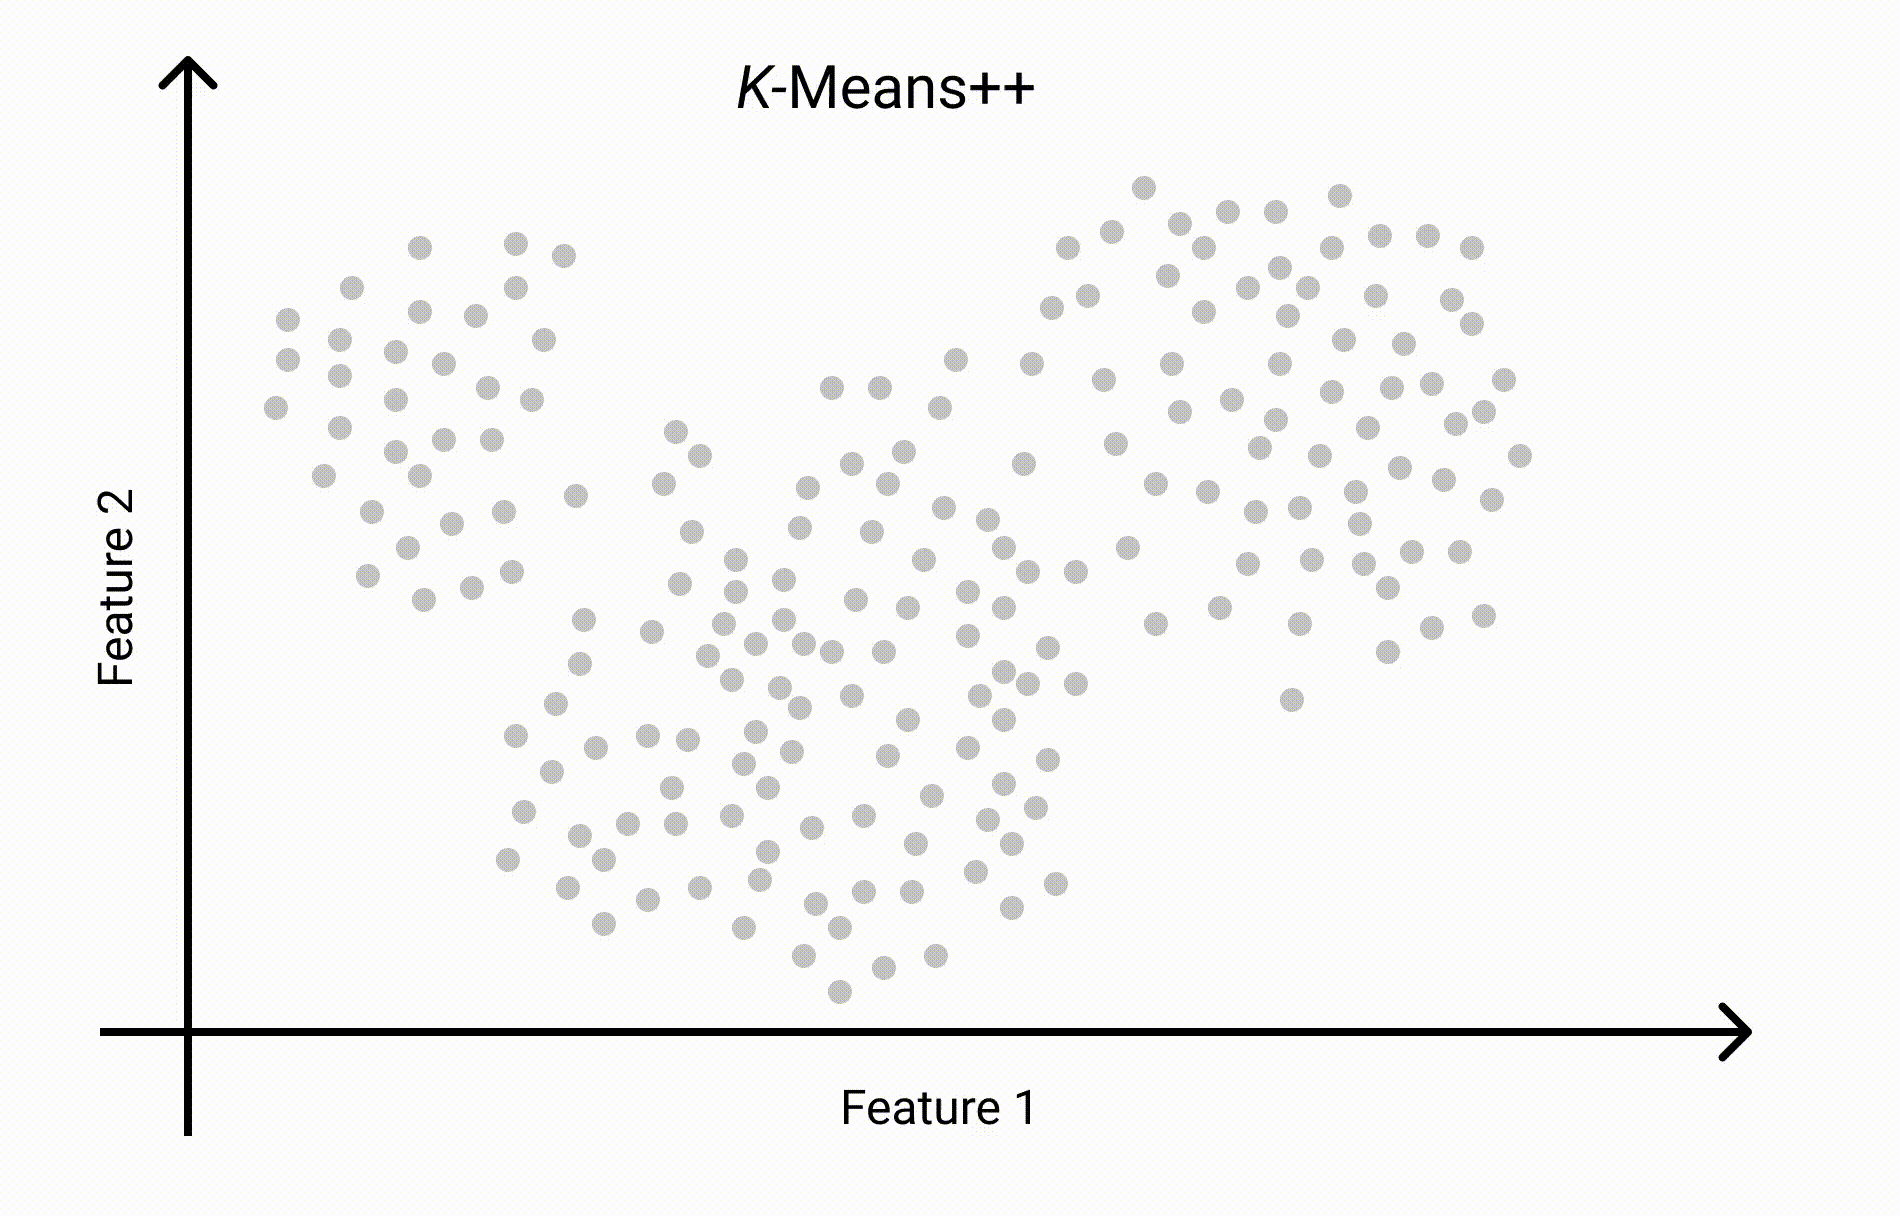</p>
     <figcaption>Figure 4: K-Means++ initialization</figcaption>
    </figure>
</div>

In [22]:
# Kmeans Model

kmeans_model = KMeans(n_clusters=5, init="k-means++", random_state=999)
kmeans_model.fit(X_reduced)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",5
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",999
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [23]:
y_pred = kmeans_model.labels_

In [24]:
from sklearn.metrics import silhouette_score

silhouette_score(X, y_pred)

0.13283876789457932